In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/Train.csv')

/home/void/anaconda3/envs/ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns[13]

'fiModelSeries'

In [4]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [6]:
df['ProductGroupDesc'].value_counts()

Track Excavators       101167
Track Type Tractors     80520
Backhoe Loaders         79415
Wheel Loader            71046
Skid Steer Loaders      43488
Motor Graders           25489
Name: ProductGroupDesc, dtype: int64

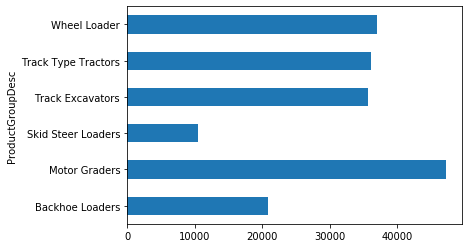

In [7]:
df.groupby('ProductGroupDesc').mean()['SalePrice'].plot(kind='barh')

In [8]:
cardinalities = []

for col in df:
    cardinality = len(pd.Index(df[col]).value_counts())
    cardinalities.append([df[col].name, int(cardinality)])
    
cardinalities = np.array(cardinalities)

<BarContainer object of 53 artists>

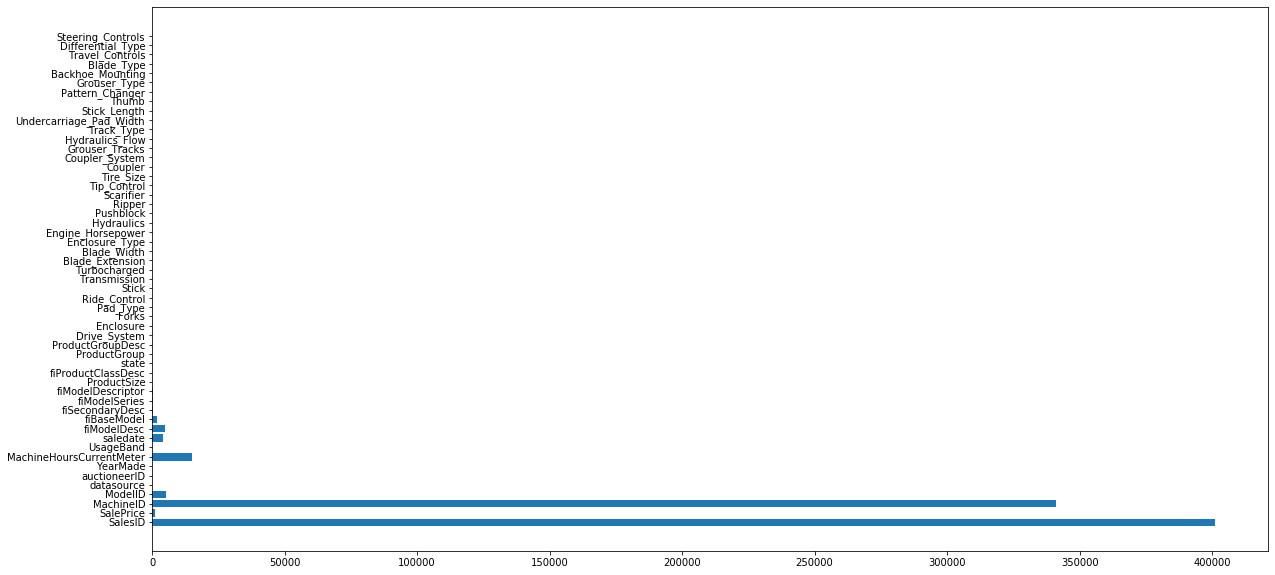

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

plt.barh(cardinalities[:, 0], cardinalities[:, 1].astype(int))

In [30]:
groupby = df.groupby('ProductGroupDesc')

In [32]:
df['ProductGroupDesc'].value_counts()

Track Excavators       101167
Track Type Tractors     80520
Backhoe Loaders         79415
Wheel Loader            71046
Skid Steer Loaders      43488
Motor Graders           25489
Name: ProductGroupDesc, dtype: int64

In [35]:
df[df['ProductGroupDesc'] == 'Track Excavators']

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12,1139283,36000,1052214,2232,121,3.0,1998,0.0,NaN,10/20/2005 0:00,...,None or Unspecified,"11' 0""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
16,1139292,13500,1026973,9510,121,3.0,1999,1972.0,Low,6/14/2007 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [39]:
def get_product_group(df, ProductGroupDesc):
    output = df[df['ProductGroupDesc']== ProductGroupDesc]
    output = output.dropna(how='all', axis = 1).drop(columns=['ProductGroup', 'ProductGroupDesc'])
    return output

In [40]:
product_dfs = []

for prod_group in df['ProductGroupDesc'].value_counts().keys():
    product_dfs.append(get_product_group(df, prod_group))

In [41]:
col_intersection = set(product_dfs[0].columns)

In [42]:
for prod_df in product_dfs[1:]:
    col_intersection = col_intersection.intersection(prod_df.columns)
    print(prod_df.columns)

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'Enclosure', 'Transmission',
       'Hydraulics', 'Ripper', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls'],
      dtype='object')
Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'fiProductClassDesc', 'state',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged'],
      dtype='object')
Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineH

In [44]:
def process_product_group(group):
    """
    feature engineering:
        find ordinal
        map yes/no to 1/0
        get dummies on categorical
    """
    return processed_df